# Synthetic Control

This NB serves as a small tutorial on how to run power analysis using synthetic control analysis. It considers that looking at some time frame and some clusters, one of the clusters will receive a treatment and the rest remain in control. This treatment cluster will receive some effect from the Perturbator. Then, we run a power analysis to understand how many times we can capture this perturbation.  

In [2]:
from itertools import product

import numpy as np
import pandas as pd
import sys
from cluster_experiments.experiment_analysis import SyntheticControlAnalysis
from cluster_experiments.perturbator import ConstantPerturbator
from cluster_experiments.power_analysis import PowerAnalysisWithPreExperimentData
from cluster_experiments.random_splitter import FixedSizeClusteredSplitter
import matplotlib.pyplot as plt


def generate_data(N, start_date, end_date):
    # Generate a list of dates between start_date and end_date
    dates = pd.date_range(start_date, end_date, freq="d")

    users = [f"User {i}" for i in range(N)]

    # Use itertools.product to create a combination of each date with each user
    combinations = list(product(users, dates))

    target_values = np.random.normal(0, 1, size=len(combinations))

    df = pd.DataFrame(combinations, columns=["user", "date"])
    df["target"] = target_values


    return df




In [ ]:
df = generate_data(10, "2022-01-01", "2022-01-30")

sw = FixedSizeClusteredSplitter(n_treatment_clusters=1, cluster_cols=["user"])

perturbator = ConstantPerturbator(
    average_effect=0.1,
)

analysis = SyntheticControlAnalysis(
    cluster_cols=["user"], time_col="date", intervention_date="2022-01-15"
)

pw = PowerAnalysisWithPreExperimentData(
    perturbator=perturbator, splitter=sw, analysis=analysis, n_simulations=50
)

power = pw.power_analysis(df)
pl = pw.power_line(df, average_effects=[0.1, 0.2, 0.5, 1, 1.5], n_jobs=-1))


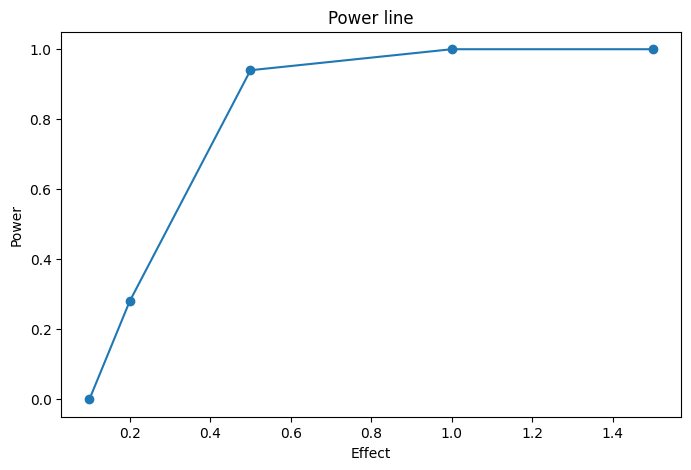

In [11]:

# Extracting keys and values
x_values = list(pl.keys())
y_values = list(pl.values())

# Creating the line graph
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o')
plt.title('Power line')
plt.xlabel('Effect')
plt.ylabel('Power')
plt.show()